{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': [{'Kernel': ['linear'], 'C': [1, 10, 100]},
  {'Kernel': ['poly'], 'degree': [2, 3]},
  {'Kernel': ['rbf'], 'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

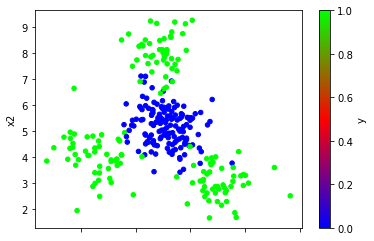

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

data = pd.read_csv('multiple2.txt', header=None, names=['x1', 'x2', 'y'])

data.plot.scatter(x='x1', y='x2', c='y', cmap='brg')

# 整理数据集,拆分测试集和训练集
x, y = data.iloc[:, :-1], data['y']
train_x, test_x, train_y, test_y =ms.train_test_split(x, y, test_size=0.25, random_state=7)
model = svm.SVC()
#网格搜索
params = [{'Kernel': ['linear'], 'C':[1, 10, 100]},
          {'Kernel': ['poly'], 'degree':[2, 3]},
          {'Kernel': ['rbf'], 'C':[1, 10, 100], 'gamma':[1, 0.1, 0.01]} ]
model = ms.GridSearchCV(model, params, cv=5)
model.get_params()
# model.fit(train_x, train_y)
# pred_text_y = model.predict(test_x)
# print(sm.classification_report(test_y, pred_text_y))

# # 暴力绘制分类边界线
# # 从x的 min-max 拆出100个x坐标
# # 从y的 min-max 拆出100个y坐标,一共组成10000个坐标点,预测每个坐标点的类别标签,绘制散点
# xs = np.linspace(data['x1'].min(), data['x1'].max(), 100)
# ys = np.linspace(data['x2'].min(), data['x2'].max(), 100)
# points = []
# for x in xs:
#     for y in ys:
#         points.append([x, y])
# points = np.array(points)
# point_labels = model.predict(points)
# plt.scatter(points[:, 0], points[:, 1], c=point_labels, cmap='gray')
# plt.scatter(test_x['x1'], test_x['x2'], c=test_y, cmap='brg')

# print(model.best_params_)
# print(model.best_score_)
# print(model.best_estimator_)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.97      0.94      0.96        35

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9511111111111111
SVC(C=1, gamma=1)


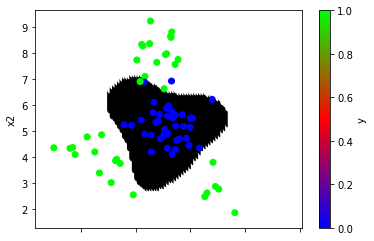

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

data = pd.read_csv('multiple2.txt', header=None, names=['x1', 'x2', 'y'])

data.plot.scatter(x='x1', y='x2', c='y', cmap='brg')

# 整理数据集,拆分测试集和训练集
x, y = data.iloc[:, :-1], data['y']
train_x, test_x, train_y, test_y =ms.train_test_split(x, y, test_size=0.25, random_state=7)
model = svm.SVC()
#网格搜索
params = [{'kernel': ['linear'], 'C':[1, 10, 100]},
          {'kernel': ['poly'], 'degree':[2, 3]},
          {'kernel': ['rbf'], 'C':[1, 10, 100], 'gamma':[1, 0.1, 0.01]} ]
model = ms.GridSearchCV(model, params, cv=5)
model.get_params()
model.fit(train_x, train_y)
pred_text_y = model.predict(test_x)
print(sm.classification_report(test_y, pred_text_y))

# 暴力绘制分类边界线
# 从x的 min-max 拆出100个x坐标
# 从y的 min-max 拆出100个y坐标,一共组成10000个坐标点,预测每个坐标点的类别标签,绘制散点
xs = np.linspace(data['x1'].min(), data['x1'].max(), 100)
ys = np.linspace(data['x2'].min(), data['x2'].max(), 100)
points = []
for x in xs:
    for y in ys:
        points.append([x, y])
points = np.array(points)
point_labels = model.predict(points)
plt.scatter(points[:, 0], points[:, 1], c=point_labels, cmap='gray')
plt.scatter(test_x['x1'], test_x['x2'], c=test_y, cmap='brg')

print(model.best_params_)
print(model.best_score_)
print(model.best_estimator_)
